In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
%matplotlib inline

### Ładowanie i przetworzenie danych

In [12]:
train = pd.read_csv('Electric_Production.csv')

train.index = train.timestamp = pd.to_datetime(train.DATE, format='%d/%m/%Y')
train.drop('DATE', axis=1, inplace=True)

train.head()

C:\Users\Arek\AppData\Local\Temp\ipykernel_5668\3690824415.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.index = train.timestamp = pd.to_datetime(train.DATE, format='%d/%m/%Y')


,Production
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151


### Metody sprawdzania stacjonarności

Badanie wizualne

<Axes: xlabel='DATE'>

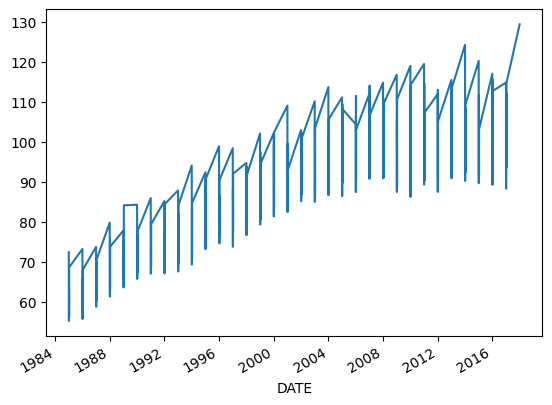

In [13]:
train['Production'].plot()

Test ADF (Rozszerzony Test Dickeya Fullera)

In [14]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print(f'Results of Dickey-Fuller Test:\n{dfoutput}')

In [15]:
adf_test(train['Production'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value 1%               -3.447631
Critical Value 5%               -2.869156
Critical Value 10%              -2.570827
dtype: float64


Test KPSS (Kwiatkowskiego-Phillipsa-Schmidta-Shina)

In [16]:
def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value
    print(f'Results of KPSS Test:\n{kpss_output}')

In [17]:
kpss_test(train['Production'])

Results of KPSS Test:
Test Statistic          3.531597
p-value                 0.010000
Lags Used              10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


C:\Users\Arek\AppData\Local\Temp\ipykernel_5668\1309912325.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


### Tworzenie szeregu czasowego stacjonarnego

Różnicowanie

<Axes: xlabel='DATE'>

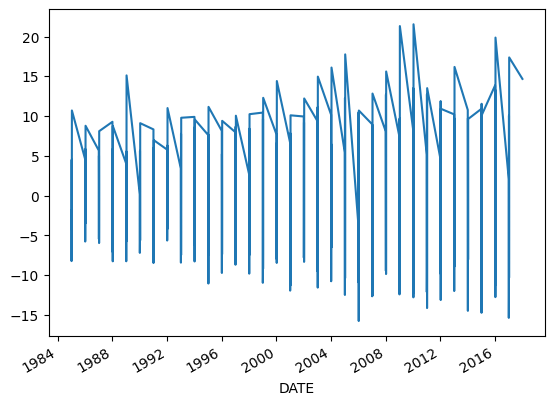

In [18]:
train['Production_diff'] = train['Production'] - train['Production'].shift(1)
train['Production_diff'].dropna().plot()

Różnicowanie sezonowe

<Axes: xlabel='DATE'>

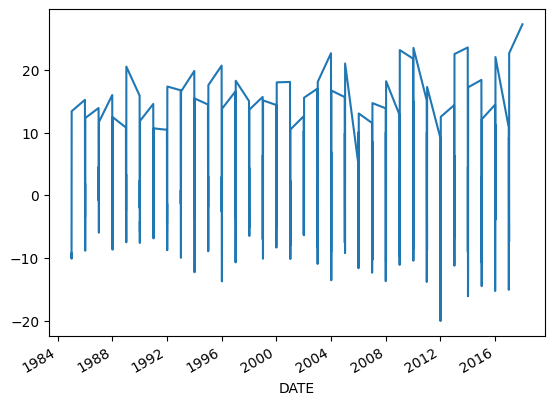

In [19]:
n = 7
train['Production_diff'] = train['Production'] - train['Production'].shift(n)
train['Production_diff'].dropna().plot()

Transformacja

<Axes: xlabel='DATE'>

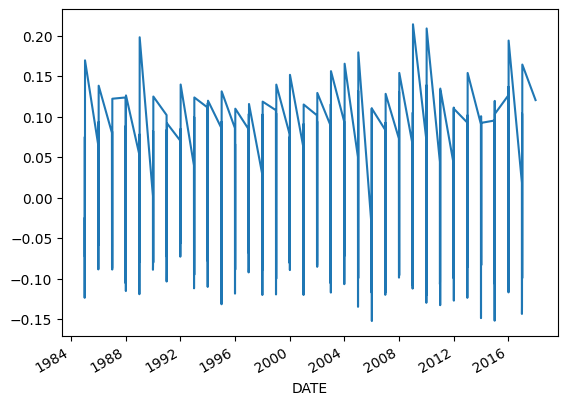

In [20]:
train['Production_log'] = np.log(train['Production'])
train['Production_log_diff'] = train['Production_log'] - train['Production_log'].shift(1)
train['Production_log_diff'].dropna().plot()